<a href="https://colab.research.google.com/github/levinaanora/Corona-Virus-Tweet-NLP/blob/main/Coronavirus_tweets_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [2]:
data = pd.read_csv("Corona_NLP_train.csv", header = 0)
data_test = pd.read_csv("Corona_NLP_test.csv", header = 0)
data.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂ’s getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [3]:
data_test.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
3793,3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3794,3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3795,3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3796,3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative
3797,3798,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to...,Extremely Positive


In [4]:
del data["UserName"], data["ScreenName"], data["Location"], data["TweetAt"]
data.head()

,OriginalTweet,Sentiment
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,advice Talk to your neighbours family to excha...,Positive
2,Coronavirus Australia: Woolworths to give elde...,Positive
3,My food stock is not the only one which is emp...,Positive
4,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
del data_test["UserName"], data_test["ScreenName"], data_test["Location"], data_test["TweetAt"]
data_test.head()

,OriginalTweet,Sentiment
0,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,When I couldn't find hand sanitizer at Fred Me...,Positive
2,Find out how you can protect yourself and love...,Extremely Positive
3,#Panic buying hits #NewYork City as anxious sh...,Negative
4,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [6]:
data["Sentiment"].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

In [7]:
data_test["Sentiment"].value_counts()

Negative              1041
Positive               947
Neutral                619
Extremely Positive     599
Extremely Negative     592
Name: Sentiment, dtype: int64

In [8]:
missing_data = pd.DataFrame({'total_missing': data.isnull().sum(), 'perc_missing': (data.isnull().sum()/41156)*100})
missing_data

,total_missing,perc_missing
OriginalTweet,0,0.0
Sentiment,0,0.0


In [9]:
max_tweet = 0
tweet_length = []
for tweet in data["OriginalTweet"]:
  tweet_length.append(len(tweet))
  if len(tweet) > max_tweet:
    max_tweet = len(tweet)

print("The longest tweet is: {}".format(max_tweet))

The longest tweet is: 355


In [10]:
def to_3_classes(x):
  if x=="Extremely Negative":
    return "Negative"
  elif x=="Extremely Positive":
    return "Positive"
  else:
    return x

data["Sentiment"] = data["Sentiment"].apply(to_3_classes)
data_test["Sentiment"] = data_test["Sentiment"].apply(to_3_classes)

In [11]:
data["Sentiment"].value_counts()

Positive    18046
Negative    15398
Neutral      7713
Name: Sentiment, dtype: int64

#Cleaning the Data


In [12]:
data["Cleaned"] = data["OriginalTweet"]
data.head()

,OriginalTweet,Sentiment,Cleaned
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Negative,"Me, ready to go at supermarket during the #COV..."


In [13]:
#clean mention
import re
def mention(df, label):
  df[label] = df[label].apply(lambda x: re.sub(r"@([a-zA-Z0-9_.-]{1,100})", " ", x))
  return df
  
data = mention(data, "Cleaned")

In [14]:
data.head()

,OriginalTweet,Sentiment,Cleaned
0,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co...
1,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,"Me, ready to go at supermarket during the #COV...",Negative,"Me, ready to go at supermarket during the #COV..."


In [15]:
#clean links
def links(df, label):
  df[label] = df[label].apply(lambda x: re.sub(r"http\S+", " ", x))
  return df
  
data = links(data, "Cleaned")

In [16]:
data.tail()

,OriginalTweet,Sentiment,Cleaned
41152,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Negative,Response to complaint not provided citing COVI...
41154,You know itÂ’s getting tough when @KameronWild...,Positive,You know itÂ’s getting tough when is ration...
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,Is it wrong that the smell of hand sanitizer i...
41156,@TartiiCat Well new/used Rift S are going for ...,Negative,Well new/used Rift S are going for $700.00 o...


In [17]:
#clean numbers
def numbers(df, label):
  df[label] = df[label].apply(lambda x: re.sub(r"\d+", " ", x))
  return df
  
data = numbers(data, "Cleaned")

In [18]:
data.tail()

,OriginalTweet,Sentiment,Cleaned
41152,Airline pilots offering to stock supermarket s...,Neutral,Airline pilots offering to stock supermarket s...
41153,Response to complaint not provided citing COVI...,Negative,Response to complaint not provided citing COVI...
41154,You know itÂ’s getting tough when @KameronWild...,Positive,You know itÂ’s getting tough when is ration...
41155,Is it wrong that the smell of hand sanitizer i...,Neutral,Is it wrong that the smell of hand sanitizer i...
41156,@TartiiCat Well new/used Rift S are going for ...,Negative,Well new/used Rift S are going for $ . on A...


In [19]:
#apply to the test set too
data_test["Cleaned"] = data_test["OriginalTweet"]
data_test = mention(data_test, "Cleaned")
data_test = links(data_test, "Cleaned")
data_test = numbers(data_test, "Cleaned")

In [20]:
data_test.tail()

,OriginalTweet,Sentiment,Cleaned
3793,Meanwhile In A Supermarket in Israel -- People...,Positive,Meanwhile In A Supermarket in Israel -- People...
3794,Did you panic buy a lot of non-perishable item...,Negative,Did you panic buy a lot of non-perishable item...
3795,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral,Asst Prof of Economics was on talking abou...
3796,Gov need to do somethings instead of biar je r...,Negative,Gov need to do somethings instead of biar je r...
3797,I and @ForestandPaper members are committed to...,Positive,I and members are committed to the safety of...


In [21]:
data_encoded = data.copy()
data_test_encoded = data_test.copy()

print("train set shape: {}".format(data_encoded.shape))
print("test set shape: {}".format(data_test_encoded.shape))

train set shape: (41157, 3)
test set shape: (3798, 3)


In [22]:
map_sentiment = {"Neutral":0, "Positive":1,"Negative":2}
data_encoded['Sentiment'] = data_encoded['Sentiment'].map(map_sentiment)
data_test_encoded['Sentiment']  = data_test_encoded['Sentiment'].map(map_sentiment)

In [23]:
from tensorflow.keras.utils import to_categorical
y_train = data['Sentiment'].copy()
y_test = data_test['Sentiment'].copy()

y_train_encoded = to_categorical(data_encoded['Sentiment'], 3)
y_test_encoded = to_categorical(data_test_encoded['Sentiment'], 3)

y_train_mapped = data_encoded['Sentiment'].copy()
y_test_mapped = data_test_encoded['Sentiment'].copy()

X_train = data_encoded[['Cleaned']].copy()
X_test = data_test_encoded[['Cleaned']].copy()

In [24]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(X_train["Cleaned"])
vocab_length = len(tokenizer.word_index) + 1
vocab_length

49251

In [25]:
list_tokenized_train = tokenizer.texts_to_sequences(X_train["Cleaned"])
list_tokenized_test = tokenizer.texts_to_sequences(X_test["Cleaned"])

In [26]:
for i in range(5):
  print("Tweet ke-{}".format(i))
  print(list_tokenized_train[i])
  i+=1

Tweet ke-0
[5, 5]
Tweet ke-1
[520, 907, 3, 35, 2613, 270, 3, 2725, 867, 1266, 1110, 442, 398, 23, 867, 1266, 7, 2613, 1213, 3785, 3431, 4894, 497, 42, 52, 49, 2410, 51, 21825, 3279, 191, 7, 1079, 3074, 50, 37, 109, 242]
Tweet ke-2
[10, 649, 3199, 3, 318, 320, 1357, 1879, 49, 268, 158, 6, 132]
Tweet ke-3
[39, 20, 84, 12, 37, 2, 102, 86, 175, 12, 225, 4, 4, 93, 168, 66, 83, 38, 29, 252, 20, 11, 149, 51, 15, 69, 37, 130, 48, 106, 15, 62, 4, 110, 1010, 110, 165, 4, 4, 6, 1951, 6, 6, 10, 4564, 21826, 21827]
Tweet ke-4
[87, 761, 3, 79, 18, 21, 56, 2, 6, 132, 4, 4, 37, 103, 229, 4252, 50, 103, 39, 20, 84, 12, 21828, 225, 2, 10, 12, 8, 862, 314, 50, 93, 168, 66, 30, 1756, 437, 4, 4, 21829, 10873, 405, 4564]


In [27]:
max_word = 0
word_count = []

for encoded_tweet in list_tokenized_train:
    word_count.append(len(encoded_tweet))
    if len(encoded_tweet) > max_word:
        max_word = len(encoded_tweet)
print("Maximum word in one tweet: {}".format(max_word))

Maximum word in one tweet: 64


In [28]:
#karena max kata di tweet adalah 64, maka kita bisa sama ratakan panjangnya input tweet menjadi 64 dengan padding
padded_data_train = pad_sequences(list_tokenized_train, maxlen=max_word, padding='post')
padded_data_test = pad_sequences(list_tokenized_test, maxlen=max_word, padding='post')
padded_data_train.shape

(41157, 64)

In [29]:
for i in range(5):
  print("Tweet ke-{}".format(i))
  print(padded_data_train[i])
  i+=1

Tweet ke-0
[5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Tweet ke-1
[  520   907     3    35  2613   270     3  2725   867  1266  1110   442
   398    23   867  1266     7  2613  1213  3785  3431  4894   497    42
    52    49  2410    51 21825  3279   191     7  1079  3074    50    37
   109   242     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0]
Tweet ke-2
[  10  649 3199    3  318  320 1357 1879   49  268  158    6  132    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]
Tweet ke-3
[   39    20    84    12    37     2   102    86   175    12   225     4
     4    93   168    66    83    3

#Tahap Modelling

In [30]:
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Bidirectional
from tensorflow.keras.layers import GlobalMaxPool1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Embedding(vocab_length, output_dim = 32, input_length = max_word))
model.add(Bidirectional(LSTM(100)))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))
adam = Adam(learning_rate=0.01)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 64, 32)            1576032   
_________________________________________________________________
bidirectional (Bidirectional (None, 200)               106400    
_________________________________________________________________
dense (Dense)                (None, 64)                12864     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 1,695,491
Trainable params: 1,695,491
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='categorical_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [32]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience=5, monitor='val_accuracy', restore_best_weights=True)
history = model.fit(padded_data_train, y_train_encoded, epochs=20, 
          validation_data=(padded_data_test, y_test_encoded), callbacks=[es])

Epoch 1/20
1287/1287 [==============================] - 138s 104ms/step - loss: 0.6080 - accuracy: 0.7601 - val_loss: 0.4584 - val_accuracy: 0.8465
Epoch 2/20
1287/1287 [==============================] - 133s 103ms/step - loss: 0.2921 - accuracy: 0.9064 - val_loss: 0.4423 - val_accuracy: 0.8594
Epoch 3/20
1287/1287 [==============================] - 129s 100ms/step - loss: 0.1874 - accuracy: 0.9431 - val_loss: 0.5497 - val_accuracy: 0.8360
Epoch 4/20
1287/1287 [==============================] - 129s 100ms/step - loss: 0.1406 - accuracy: 0.9559 - val_loss: 0.7103 - val_accuracy: 0.8410
Epoch 5/20
1287/1287 [==============================] - 129s 100ms/step - loss: 0.1155 - accuracy: 0.9628 - val_loss: 0.6228 - val_accuracy: 0.8544
Epoch 6/20
1287/1287 [==============================] - 129s 100ms/step - loss: 0.1033 - accuracy: 0.9668 - val_loss: 0.6542 - val_accuracy: 0.8552
Epoch 7/20
1287/1287 [==============================] - 129s 100ms/step - loss: 0.0898 - accuracy: 0.9702 - val_

In [33]:
model.evaluate(padded_data_test,y_test_encoded)

119/119 [==============================] - 2s 20ms/step - loss: 0.4423 - accuracy: 0.8594


[0.4423185884952545, 0.859399676322937]

In [34]:
predicted = model.predict(padded_data_test)
y_pred = predicted.argmax(axis=-1)

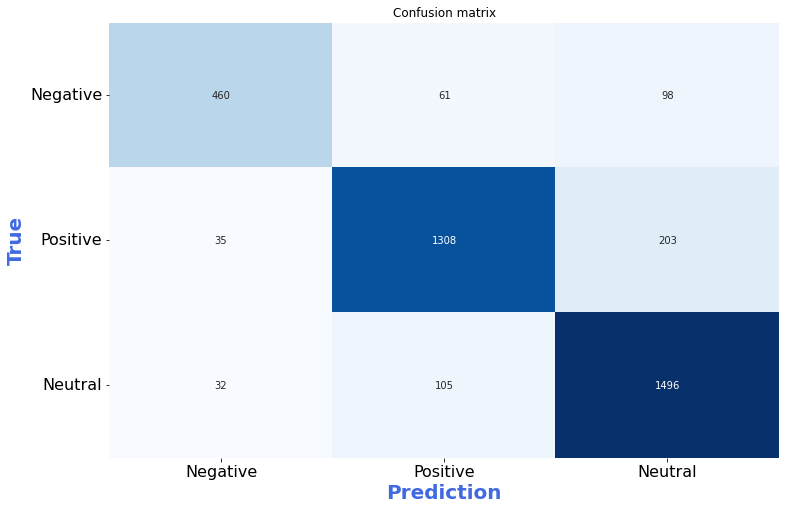

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_mapped, y_pred)
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.heatmap(cm, annot=True, fmt='d', ax=ax, cmap=plt.cm.Blues, cbar=False)
ax.set(xticklabels=list(y_test.unique()), yticklabels=list(y_test.unique()), title="Confusion matrix")
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.set_ylabel("True", color="royalblue", fontsize=20, fontweight=700)
ax.set_xlabel("Prediction", color="royalblue", fontsize=20, fontweight=700)
plt.yticks(rotation=0);

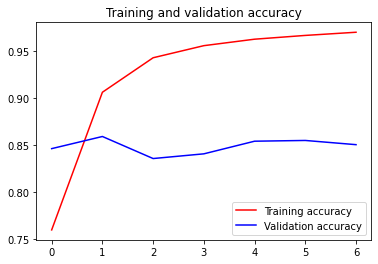

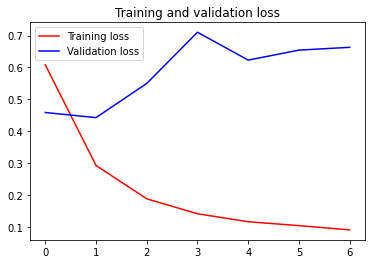

<Figure size 432x288 with 0 Axes>

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [37]:
model.save('corona_nlp_ver3.h5')